## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/HR Absenteeism data.csv')

In [ ]:
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


## Exploring the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [ ]:
df.isnull().sum()

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


# Individuals under 18 and over 65 were excluded from the dataset

In [ ]:
df = df.drop(df[df["Age"] > 65 ].index)

In [ ]:
df = df.drop(df[df["Age"] < 18].index)

# EmployeeNumber, GivenName, and Surname have been dropped from the dataset as they are irrelevant. 

In [ ]:
df=df.drop(['EmployeeNumber','GivenName','Surname'],axis=1)

In [ ]:
df.shape

(8165, 10)

# Dividing the variables into categories based on their characteristics.

In [ ]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']

In [ ]:
numerical = [i for i in df.columns if df[i].dtypes != 'O']

In [ ]:
print(categorical,"\n\n\n",numerical)

['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit'] 


 ['Age', 'LengthService', 'AbsentHours']


# Plots

<Axes: xlabel='Gender', ylabel='count'>

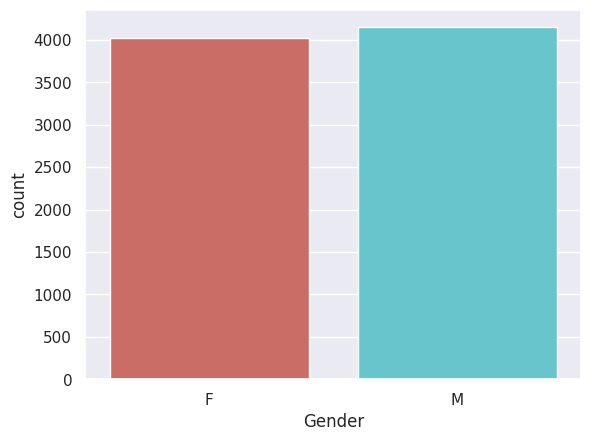

In [ ]:

sns.countplot(data=df, x='Gender', palette="hls")

<Axes: xlabel='BusinessUnit', ylabel='count'>

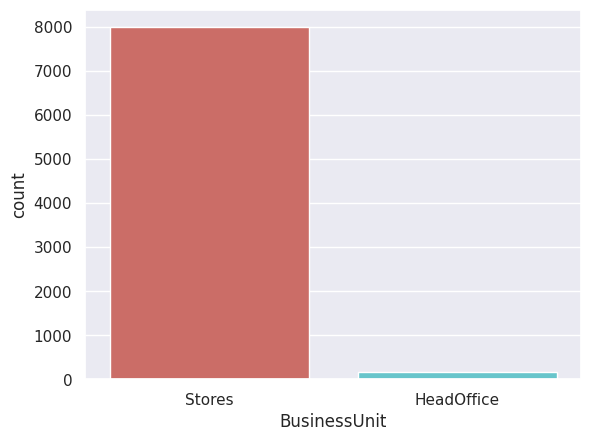

In [ ]:
sns.set(style="darkgrid")
sns.countplot(data =df, x='BusinessUnit', palette="hls")

## 1- The workforce comprises a nearly equal number of male and female employees.
## 2- The majority of employees are stationed at stores, while a smaller proportion work at the head office.

In [ ]:
def Titles(job):
    if 'manager' in job.lower():
        job='Manager'
    if 'director' in job.lower():
        job='Director'
    if 'clerk' in job.lower():
        job='Clerk'
    if 'analyst' in job.lower():
        job='Analyst'
    if 'vp' in job.lower():
        job='VP'
    else:
        job=job
    return job

In [ ]:
df['JobTitle']=df['JobTitle'].apply(Titles)

In [ ]:

df.JobTitle.value_counts()

Cashier                            1663
Dairy Person                       1476
Meat Cutter                        1461
Baker                              1375
Clerk                              1147
Shelf Stocker                       701
Manager                             216
Analyst                              50
Auditor                              14
Trainer                              14
Recruiter                            12
Director                             11
Benefits Admin                       11
VP                                    4
Corporate Lawyer                      3
Exec Assistant, Human Resources       2
Legal Counsel                         1
Exec Assistant, Legal Counsel         1
CHief Information Officer             1
Exec Assistant, Finance               1
CEO                                   1
Name: JobTitle, dtype: int64

<Axes: xlabel='count', ylabel='JobTitle'>

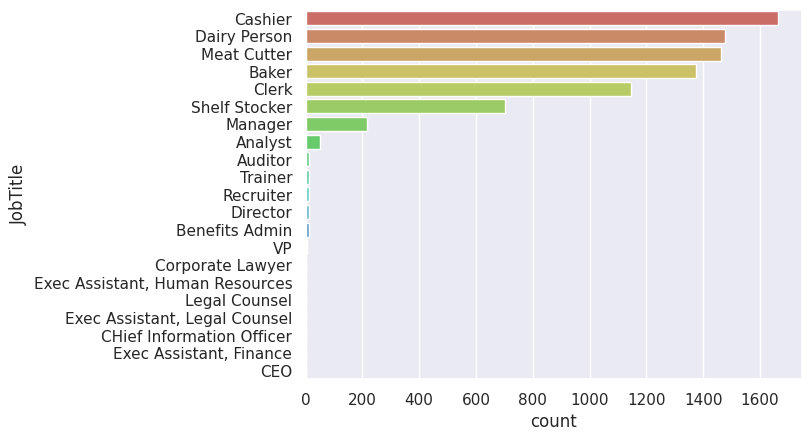

In [ ]:
sns.countplot(y=df.JobTitle,order=df.JobTitle.value_counts().index, palette="hls") 

<Axes: xlabel='count', ylabel='DepartmentName'>

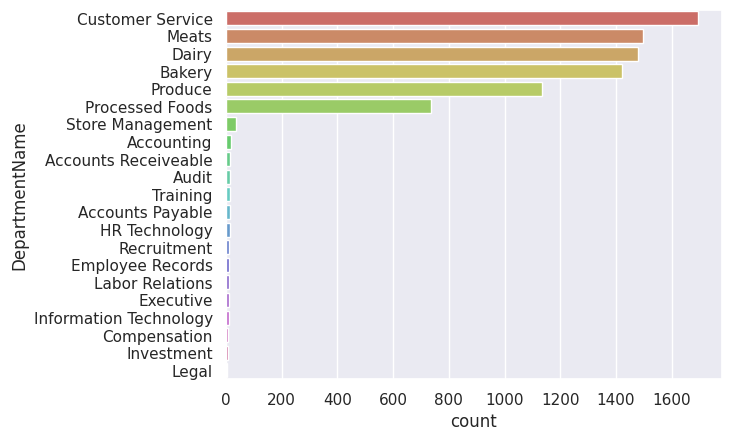

In [ ]:
sns.countplot(y=df.DepartmentName,order=df.DepartmentName.value_counts().index, palette="hls")

<Axes: xlabel='count', ylabel='StoreLocation'>

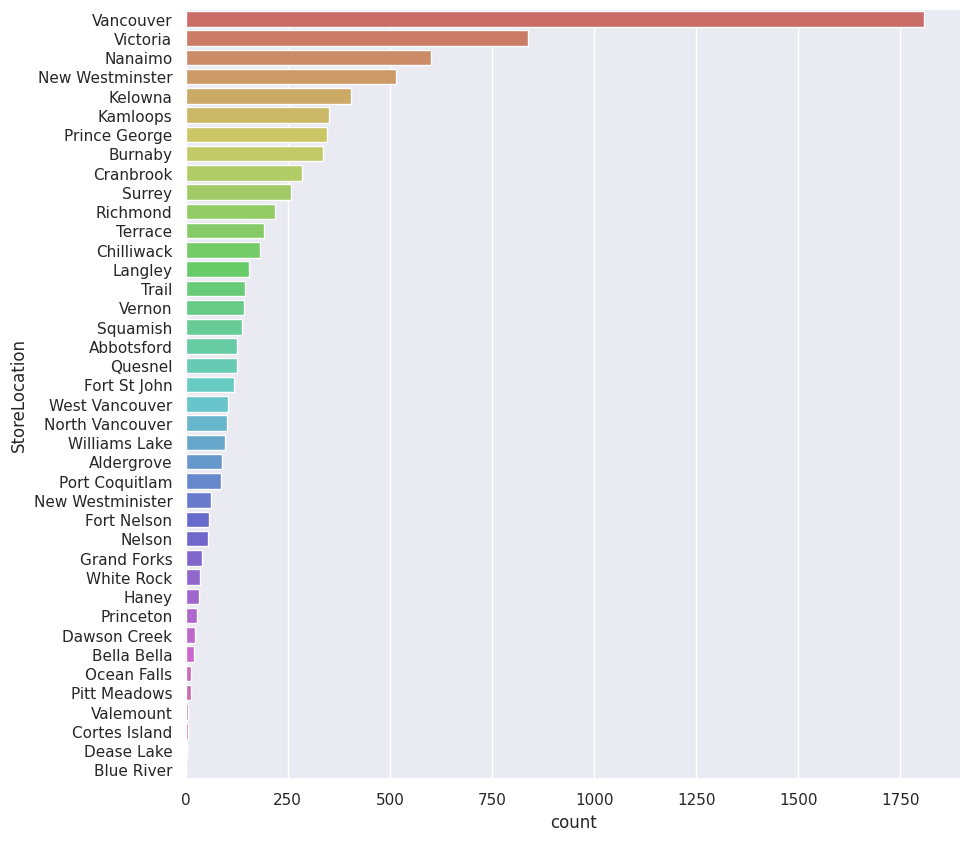

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=df.StoreLocation,order=df.StoreLocation.value_counts().index, palette="hls")

<Axes: >

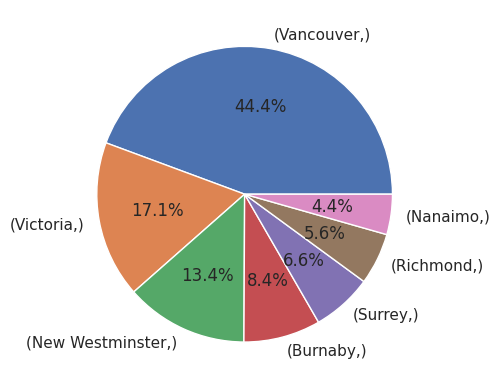

In [ ]:
df[['City']].value_counts()[:7].plot(kind='pie',autopct='%1.1f%%')    

In [ ]:

df['Division'].value_counts()

Stores                  7993
HumanResources            75
FinanceAndAccounting      73
Executive                 11
InfoTech                  10
Legal                      3
Name: Division, dtype: int64

## Observation:-
### 1- The majority of individuals are employed in customer service as cashiers, while in the bakery sector, the prominent roles are meat cutters and bakers.

### 2- Vancouver has the highest concentration of stores, followed by Victoria, Nanaimo, and finally New Westminster, in terms of their distribution across the region.

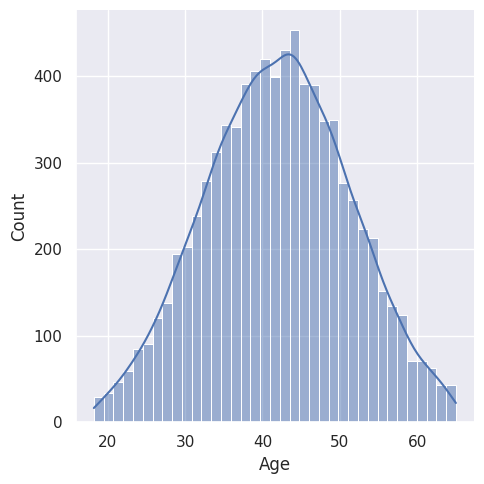

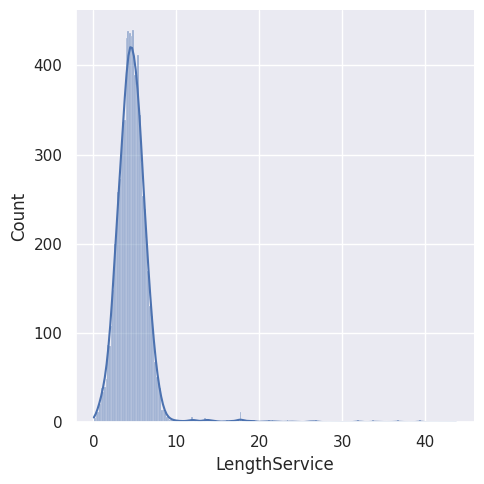

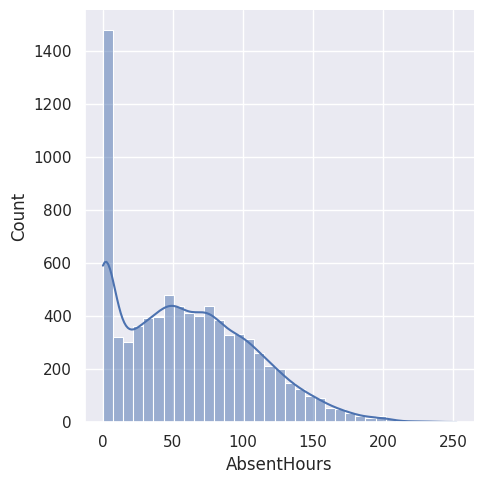

In [ ]:
for i in numerical:
    print(sns.displot(df[i],kde=True))

## Observation
### 1- The distribution of age follows a normal distribution pattern, indicating that it is evenly spread across a range of values.

### 2- The length of service exhibits a slight right skew, implying that there are more employees with shorter tenures compared to those with longer tenures.

### 3- Absenteeism hours are characterized by a log-normal distribution, suggesting that there are a limited number of employees who are absent for extended periods, while the majority of employees have shorter periods of absence.

## Scatter Plot

<Axes: xlabel='Age', ylabel='AbsentHours'>

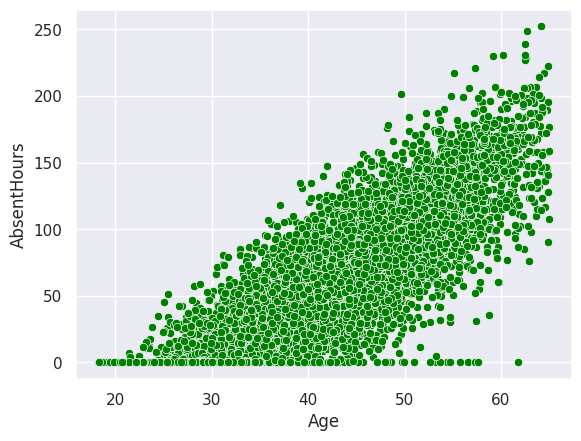

In [ ]:
sns.scatterplot(data=df, x='Age', y='AbsentHours', color="green")

<Axes: xlabel='LengthService', ylabel='AbsentHours'>

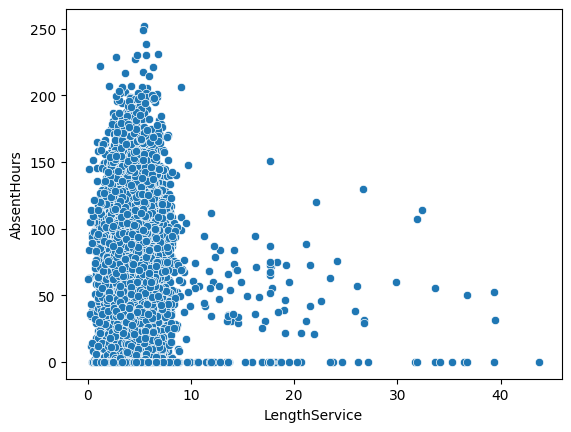

In [ ]:
sns.scatterplot(data=df, x='LengthService', y='AbsentHours')

## Observation
### 1- A noticeable trend emerges as age increases, indicating a corresponding increase in the number of absent hours among employees.

### 2- On the other hand, there is no strong correlation between length of service and absent hours. However, it is interesting to note that employees with shorter length of service tend to have a higher number of absent hours, displaying a right-skewed distribution.

## Barplot


<Axes: xlabel='Gender', ylabel='AbsentHours'>

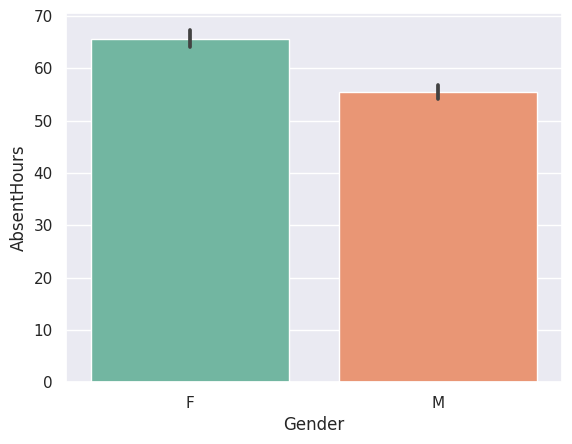

In [ ]:
sns.barplot(data = df, x = 'Gender', y = 'AbsentHours', palette='Set2')

## Observation
### Females demonstrate higher levels of absenteeism than males, with a tendency for more absent hours.

## Box Plot

<Axes: xlabel='Gender', ylabel='AbsentHours'>

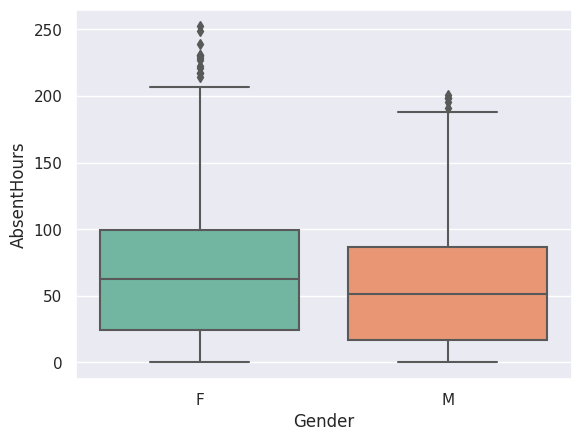

In [ ]:
sns.boxplot(x='Gender',y='AbsentHours',data=df,palette='Set2')

In [ ]:
df[df['AbsentHours']>200]['Gender'].value_counts()

F    26
M     1
Name: Gender, dtype: int64

### Females significantly outnumber males in terms of exceeding 200+ hours of absenteeism, with 26 females compared to just one male.

<Axes: xlabel='AbsentHours', ylabel='StoreLocation'>

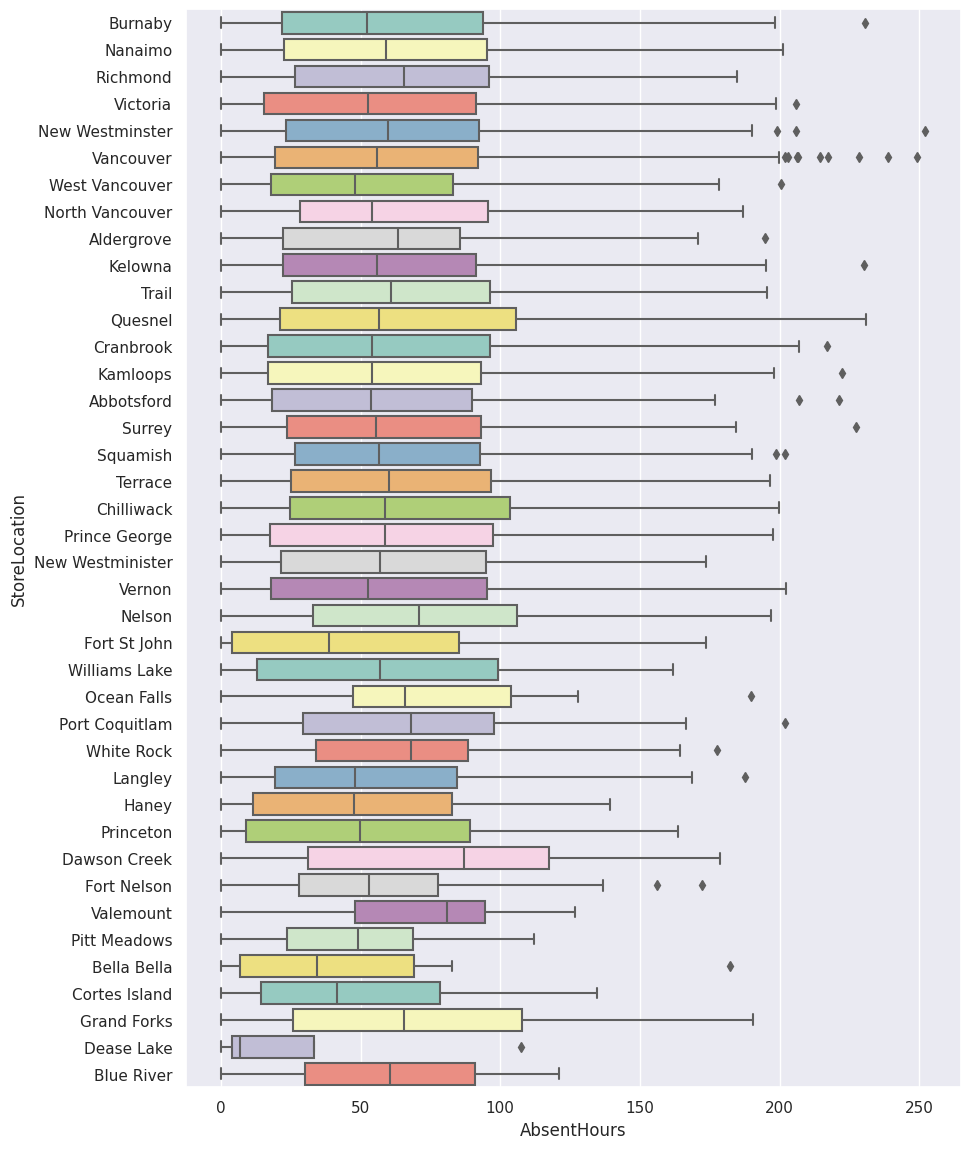

In [ ]:
plt.figure(figsize=(10,14))     
sns.boxplot(x='AbsentHours',y='StoreLocation',data=df, palette='Set3')

## Observation
### 1- Vancouver stands out as the location with the highest number of outliers, indicating a significant presence of employees with a high number of absent hours.


<Axes: xlabel='AbsentHours', ylabel='JobTitle'>

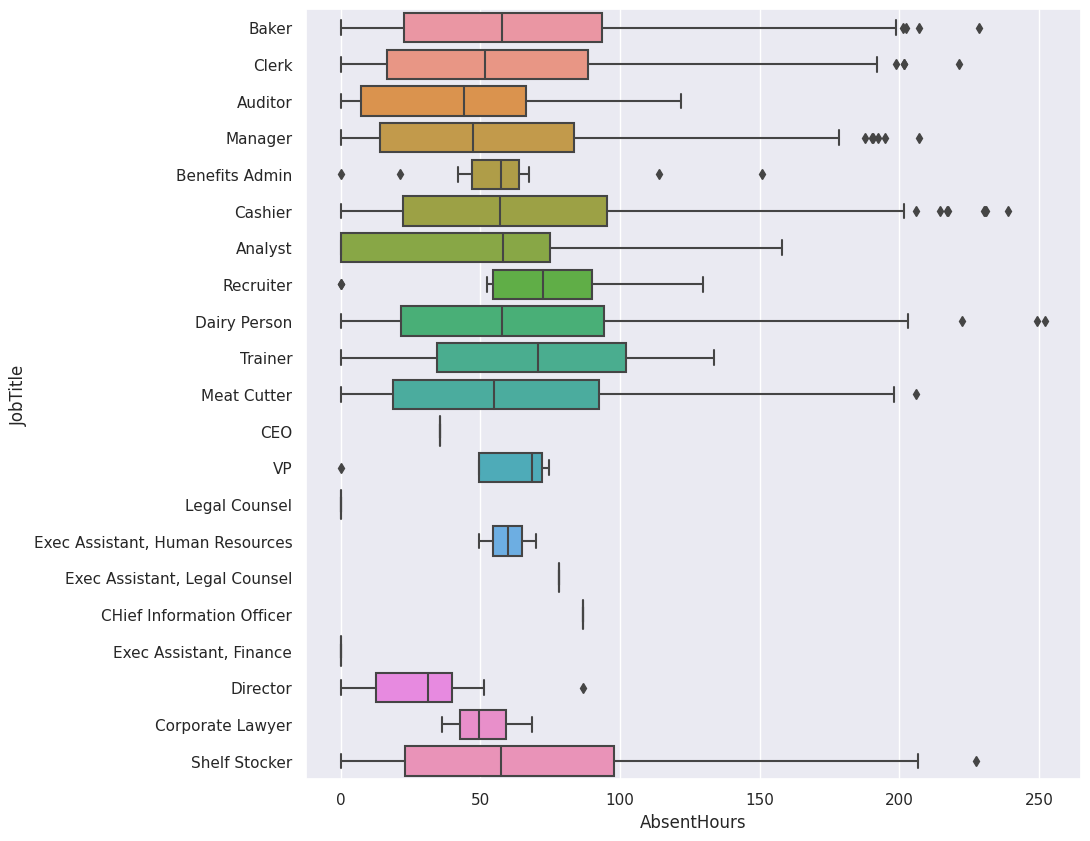

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='AbsentHours',y='JobTitle',data=df)

## Observation 
### 1- Cashiers show higher absenteeism compared to other job titles.
### 2- Managers, bakers, and clerks exhibit a notable number of outliers, indicating more absent hours among employees with these positions.
### 3- The dairy person not only has higher absenteeism but also holds the record for the highest number of absent hours, reaching 249 and 252 hours.

<Axes: xlabel='AbsentHours', ylabel='DepartmentName'>

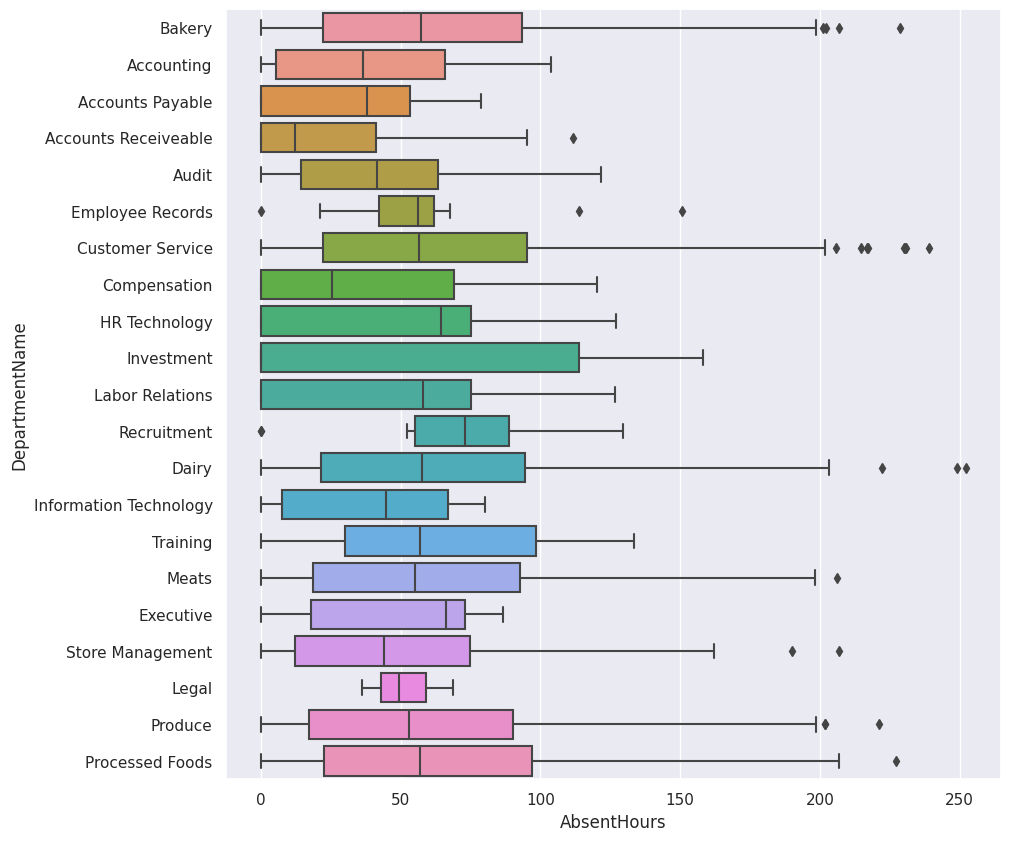

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='AbsentHours',y='DepartmentName',data=df)

<Axes: xlabel='AbsentHours', ylabel='BusinessUnit'>

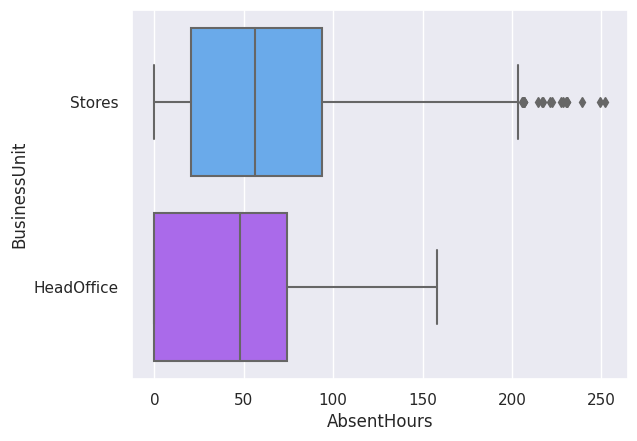

In [ ]:
sns.boxplot(x='AbsentHours',y='BusinessUnit',data=df,palette='cool')

## Heatmap

<Axes: >

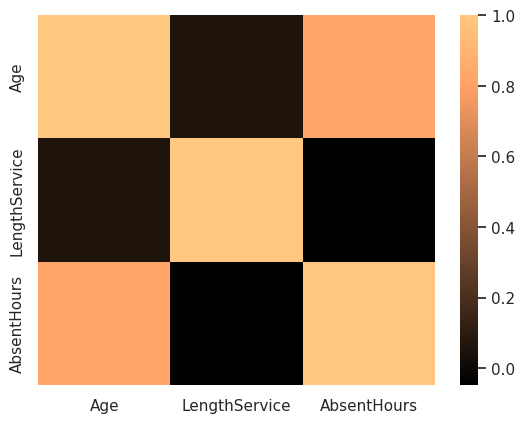

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='copper')

## In summary:

### 1. Age and absent hours are positively correlated, indicating that absenteeism tends to increase with age. Length of service does not show a significant correlation with absent hours.

### 2. Females have higher levels of absenteeism compared to males, with females also being absent for longer durations.

### 3. Vancouver has the highest rate of absenteeism among the different store locations.
